행정동 입력 : 압구정동


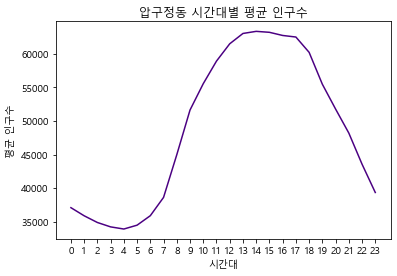

In [3]:
#11장 하위 목표 1

import matplotlib.pyplot as plt
import csv

#파일 읽어 들이기
f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
f2 = open('dong_code.csv')

data = csv.reader(f1)
next(data)
data = list(data)

code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

#데이터 타입 변환하기
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
for row in code_data:
    row[1] = int(row[1])
    
dong_code = 0
dong_name = input('행정동 입력 : ')
population = [0 for i in range(24)]

#행정동 코드 가져오기
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

#행정동 코드 <-> 행정동 인구
for row in data:
    if dong_code == row[2]:
        population[row[1]] += row[3]
        
population = [p/31 for p in population]

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 시간대별 평균 인구수')
        
plt.plot(population, color='indigo')
plt.xticks(range(24), range(24))
plt.xlabel('시간대')
plt.ylabel('평균 인구수')
plt.show()

행정동 입력 : 압구정동
2019년 12월의 주중 일수 = 22 주말 일수 = 9


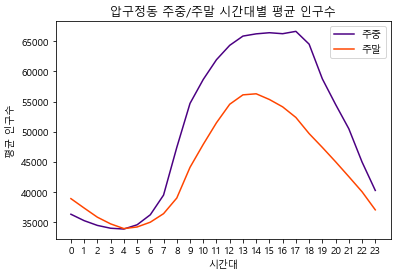

In [10]:
#11장 하위 목표 2 곡선 그래프

import matplotlib.pyplot as plt
import csv
import datetime

#파일 읽어 들이기
f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
f2 = open('dong_code.csv')

data = csv.reader(f1)
next(data)
data = list(data)

code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

#데이터 타입 변환하기
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
for row in code_data:
    row[1] = int(row[1])
    
dong_code = 0
dong_name = input('행정동 입력 : ')

#행정동 코드 가져오기
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

#행정동 코드 <-> 행정동 인구
#for row in data:
#    if dong_code == row[2]:
#        population[row[1]] += row[3]

weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
        num = datetime.date(year, mon, day).weekday()
        if num < 5:
            weekday[time] += p
        else:
            weekend[time] += p

#주말, 주중 일수 세서 평균 인구 구하기
weekday_cnt, weekend_cnt = 0, 0

for i in range(1, 32): #31일 까지
    if datetime.date(2019, 12, i).weekday() < 5:
        weekday_cnt += 1
    else:
        weekend_cnt += 1
        
print('2019년 12월의 주중 일수 =', weekday_cnt, '주말 일수 =', weekend_cnt)

weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구수')
        
plt.plot(weekday, color='indigo', label='주중')
plt.plot(weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구수')
plt.xticks(range(24), range(24))
plt.show()

행정동 입력 : 압구정동
2019년 12월의 주중 일수 = 22 주말 일수 = 9


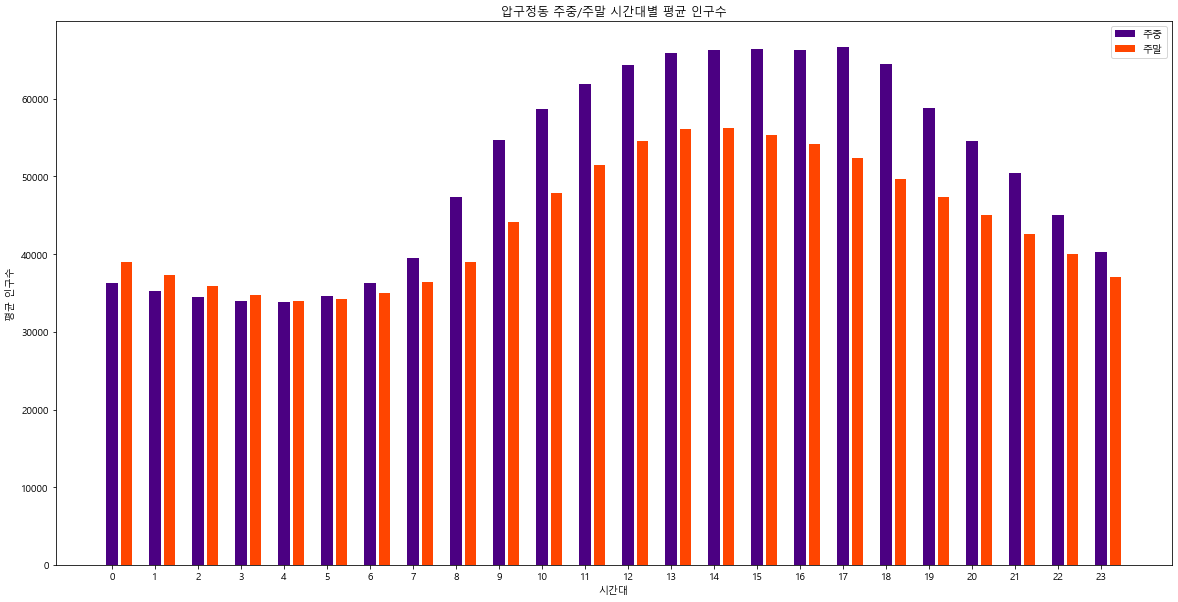

In [9]:
#11장 하위 목표 2 막대 그래프

import matplotlib.pyplot as plt
import csv
import datetime

#파일 읽어 들이기
f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
f2 = open('dong_code.csv')

data = csv.reader(f1)
next(data)
data = list(data)

code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

#데이터 타입 변환하기
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
for row in code_data:
    row[1] = int(row[1])
    
dong_code = 0
dong_name = input('행정동 입력 : ')

#행정동 코드 가져오기
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

#행정동 코드 <-> 행정동 인구
#for row in data:
#    if dong_code == row[2]:
#        population[row[1]] += row[3]

weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
        num = datetime.date(year, mon, day).weekday()
        if num < 5:
            weekday[time] += p
        else:
            weekend[time] += p

#주말, 주중 일수 세서 평균 인구 구하기
weekday_cnt, weekend_cnt = 0, 0

for i in range(1, 32): #31일 까지
    if datetime.date(2019, 12, i).weekday() < 5:
        weekday_cnt += 1
    else:
        weekend_cnt += 1
        
print('2019년 12월의 주중 일수 =', weekday_cnt, '주말 일수 =', weekend_cnt)

weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

plt.figure(figsize=(20, 10))
plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구수')
        
#24일 x 3칸 = 72칸.
plt.bar(range(0, 72, 3), weekday, color='indigo', label='주중')
plt.bar(range(1, 73, 3), weekend, color='orangered', label='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구수')
plt.xticks(range(0, 72, 3), range(24))
plt.show()

행정동 입력 : 압구정동


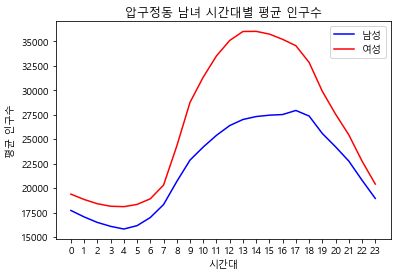

In [1]:
#11장 하위 목표 3 곡선 그래프

import matplotlib.pyplot as plt
import csv
import datetime

#파일 읽어 들이기
f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
f2 = open('dong_code.csv')

data = csv.reader(f1)
next(data)
data = list(data)

code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

#데이터 타입 변환하기
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
for row in code_data:
    row[1] = int(row[1])
    
dong_code = 0
dong_name = input('행정동 입력 : ')

#행정동 코드 가져오기
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

#행정동 코드 <-> 행정동 인구
#for row in data:
#    if dong_code == row[2]:
#        population[row[1]] += row[3]

male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        #행정동의 동일한 시간대의 남녀 인구를 각각 저장
        time = row[1]
        
        male[time] += sum(row[4:18])
        female[time] += sum(row[18:32])
        
male = [m/31 for m in male]
female =[f/31 for f in female]

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 남녀 시간대별 평균 인구수')
        
plt.plot(male, color='b', label='남성')
plt.plot(female, color='r', label='여성')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구수')
plt.xticks(range(24), range(24))
plt.show()

행정동 입력 : 압구정동


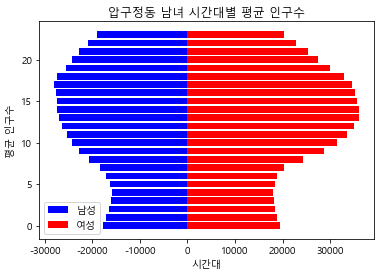

In [15]:
#11장 하위 목표 3 막대 그래프

import matplotlib.pyplot as plt
import matplotlib
import csv
import datetime

#파일 읽어 들이기
f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
f2 = open('dong_code.csv')

data = csv.reader(f1)
next(data)
data = list(data)

code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

#데이터 타입 변환하기
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
for row in code_data:
    row[1] = int(row[1])
    
dong_code = 0
dong_name = input('행정동 입력 : ')

#행정동 코드 가져오기
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

#행정동 코드 <-> 행정동 인구
#for row in data:
#    if dong_code == row[2]:
#        population[row[1]] += row[3]

male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        #행정동의 동일한 시간대의 남녀 인구를 각각 저장
        time = row[1]
        
        male[time] += sum(row[4:18])
        female[time] += sum(row[18:32])
        
male = [m/31 for m in male]
female =[f/31 for f in female]

male = [-m for m in male]
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 남녀 시간대별 평균 인구수')
        
plt.barh(range(24), male, color='b', label='남성')
plt.barh(range(24), female, color='r', label='여성')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균 인구수')
plt.show()

행정동 입력 : 압구정동
비교할 행정동 입력 : 역삼2동


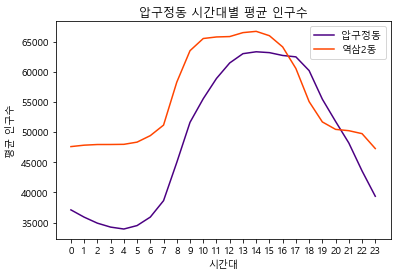

In [16]:
#11장 하위 목표 4

import matplotlib.pyplot as plt
import csv

#파일 읽어 들이기
f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
f2 = open('dong_code.csv')

data = csv.reader(f1)
next(data)
data = list(data)

code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

#데이터 타입 변환하기
for row in data:
    for i in range(1, 32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
for row in code_data:
    row[1] = int(row[1])
    
dong_code = 0
dong_code2 = 0
dong_name = input('행정동 입력 : ')
dong_name2 = input('비교할 행정동 입력 : ')

population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

#행정동 코드 가져오기
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

#행정동 코드 <-> 행정동 인구
for row in data:
    if dong_code == row[2]:
        population[row[1]] += row[3]
        
for row in code_data:
    if row[-1] == dong_name2:
        dong_code2 = row[1]

for row in data:
    if dong_code2 == row[2]:
        population2[row[1]] += row[3]
        
population = [p/31 for p in population]
population2 = [p/31 for p in population2]

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 시간대별 평균 인구수')
        
plt.plot(population, color='indigo', label=dong_name)
plt.plot(population2, color='orangered', label=dong_name2)
plt.legend()
plt.xticks(range(24), range(24))
plt.xlabel('시간대')
plt.ylabel('평균 인구수')
plt.show()